# **Machine Learning with Lebron James**


### **Glenn Jenkins' Responsibilities**
* Regression Analysis with scikit-learn Library

### **Kyle Hustek's Responsibilites**
* Logistic Regression
* PyTorch Neural Network

### Application of machine learning techniques on the playing career of Lebron James

Import datasets from our github repo, and other basic setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
from scipy import stats

# Datasets loaded in directly from URL on our github repository. If these do not work, please email us.
train = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/e6caae08cf2bcbb5bbb3867fe99ddfd9176030b6/lebron_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/master/lebron_test.csv')

# Filling in empty cells with the mean of their column values
train['FG%'].fillna(train['FG%'].mean(), inplace = True)
test['FG%'].fillna(test['FG%'].mean(), inplace = True)
train['3P%'].fillna(train['3P%'].mean(), inplace = True)
test['3P%'].fillna(test['3P%'].mean(), inplace = True)
train['FT%'].fillna(train['FT%'].mean(), inplace = True)
test['FT%'].fillna(test['FT%'].mean(), inplace = True)

# Provide a list of the header names
statistic_names = list(train.columns.values)

## **(1) Linear Regression with scikit-learn Library**
I will find Root-Mean-Square Error, and R-squared values for correlations between one feature and one target value. 

In the code below, I find the best RMSE and R2 scores for each statistic. 

**RMSE** measures the mean square magnitude of errors, and gives greater weight to outliers. Values are greater than 0, where 0 means the feature perfectly predicts the target. This is only used to find the best positively correlated feature.

**R2** measures how correlated the feature and target statistics are, where values can be from -infinity to 1, or -infinity% to 100%, though usually values are between -1 and 1, where a higher absolute value is desirable as a predictor. This is used to find the best positive OR negative correlated feature

---

### **(1.1) Predicting Result**
Calculating all of the single, double, and triple variable predictors for the boolean variable 'Result', which represents winning or losing. Output can be found in CSV format [here](https://github.com/jenkins1085/MachineLebron/blob/master/predict_result.csv).

In-depth analysis of this data is in Glenn Jenkins' project report.

In [3]:
# Find and print the r2 and rmse for each  
# using one predictor
print('Stat One, Stat Two, Stat Three, R2, RMSE')
for i in statistic_names:
  if i != 'Result':
    train_data = train[[i]]
    test_data = test[[i]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['Result']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['Result']], testpredict))
    r2 = r2_score(test[['Result']], testpredict)
    print(f'{i},,,{r2:.5f},{rmse:.5f}')

# using two predictors
stat_pairs = list(combinations(statistic_names, 2))
for i, j in stat_pairs:
  if i != 'Result' and j !='Result':
    train_data = train[[i, j]]
    test_data = test[[i, j]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['Result']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['Result']], testpredict))
    r2 = r2_score(test[['Result']], testpredict)
    print(f'{i},{j},,{r2:.5f},{rmse:.5f}')

# using three predictors
stat_triples = list(combinations(statistic_names, 3))
for i, j, k in stat_triples:
  if i != 'Result' and j !='Result' and k != 'Result':
    train_data = train[[i, j, k]]
    test_data = test[[i, j, k]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['Result']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['Result']], testpredict))
    r2 = r2_score(test[['Result']], testpredict)
    print(f'{i},{j},{k},{r2:.5f},{rmse:.5f}')

Stat One, Stat Two, Stat Three, R2, RMSE
MP,,,-0.06052,0.47921
FG,,,-0.01334,0.46843
FGA,,,-0.00325,0.46609
FG%,,,-0.01042,0.46775
3P,,,0.00976,0.46306
3PA,,,-0.01976,0.46991
3P%,,,0.01330,0.46223
FT,,,-0.00668,0.46689
FTA,,,-0.00442,0.46636
FT%,,,-0.00095,0.46556
ORB,,,0.00025,0.46528
DRB,,,0.06696,0.44949
TRB,,,0.04708,0.45425
AST,,,0.01322,0.46225
STL,,,0.02391,0.45974
BLK,,,0.02006,0.46064
TOV,,,-0.04504,0.47570
PF,,,0.00385,0.46444
PTS,,,-0.00513,0.46653
GmSc,,,0.02373,0.45978
MP,FG,,-0.08402,0.48449
MP,FGA,,-0.05559,0.47809
MP,FG%,,-0.04709,0.47617
MP,3P,,-0.05431,0.47780
MP,3PA,,-0.05561,0.47810
MP,3P%,,-0.05135,0.47713
MP,FT,,-0.08312,0.48429
MP,FTA,,-0.08208,0.48406
MP,FT%,,-0.05950,0.47898
MP,ORB,,-0.05944,0.47897
MP,DRB,,0.00401,0.46440
MP,TRB,,-0.00818,0.46724
MP,AST,,-0.04382,0.47542
MP,STL,,-0.01557,0.46895
MP,BLK,,-0.03196,0.47271
MP,TOV,,-0.09765,0.48753
MP,PF,,-0.05526,0.47802
MP,PTS,,-0.08343,0.48436
MP,GmSc,,-0.03228,0.47279
FG,FGA,,-0.01359,0.46849
FG,FG%,,-0.00136,

---

### **(1.2) Predicting Points Scored**
Calculating all of the single, double, and triple variable predictors for the variable 'PTS', which represents the number of points scored in a single game. Output can be found in CSV format [here](https://github.com/jenkins1085/MachineLebron/blob/master/predict_pts.csv)

In-depth analysis of this data is in Glenn Jenkins' project report.

In [4]:
# Find and print the r2 and rmse for each  
# using one predictor
print('Stat One, Stat Two, Stat Three, R2, RMSE')
for i in train:
  if i != 'PTS':
    train_data = train[[i]]
    test_data = test[[i]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['PTS']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['PTS']], testpredict))
    r2 = r2_score(test[['PTS']], testpredict)
    print(f'{i},,,{r2:.5f},{rmse:.5f}')

# using two predictors
stat_pairs = list(combinations(statistic_names, 2))
for i, j in stat_pairs:
  if i != 'PTS' and j !='PTS':
    train_data = train[[i, j]]
    test_data = test[[i, j]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['PTS']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['PTS']], testpredict))
    r2 = r2_score(test[['PTS']], testpredict)
    print(f'{i},{j},,{r2:.5f},{rmse:.5f}')

# using three predictors
stat_triples = list(combinations(statistic_names, 3))
for i, j, k in stat_triples:
  if i != 'PTS' and j !='PTS' and k != 'PTS':
    train_data = train[[i, j, k]]
    test_data = test[[i, j, k]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train[['PTS']])
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test[['PTS']], testpredict))
    r2 = r2_score(test[['PTS']], testpredict)
    print(f'{i},{j},{k},{r2:.5f},{rmse:.5f}')

Stat One, Stat Two, Stat Three, R2, RMSE
Result,,,-0.06958,6.90931
MP,,,0.33993,5.42781
FG,,,0.85668,2.52922
FGA,,,0.63249,4.05008
FG%,,,0.27860,5.67435
3P,,,-0.15737,7.18726
3PA,,,-0.29747,7.60985
3P%,,,-0.02560,6.76576
FT,,,-0.21541,7.36528
FTA,,,-0.21729,7.37096
FT%,,,-0.10665,7.02802
ORB,,,-0.06039,6.87956
DRB,,,-0.05223,6.85303
TRB,,,-0.04663,6.83477
AST,,,-0.06818,6.90479
STL,,,-0.01010,6.71444
BLK,,,-0.01852,6.74237
TOV,,,-0.05558,6.86393
PF,,,-0.05096,6.84890
GmSc,,,0.74728,3.35852
Result,MP,,0.29292,5.61775
Result,FG,,0.85839,2.51409
Result,FGA,,0.61689,4.13514
Result,FG%,,0.27968,5.67010
Result,3P,,-0.18049,7.25870
Result,3PA,,-0.34612,7.75121
Result,3P%,,-0.03417,6.79399
Result,FT,,-0.21174,7.35415
Result,FTA,,-0.21451,7.36255
Result,FT%,,-0.10916,7.03598
Result,ORB,,-0.06854,6.90596
Result,DRB,,-0.06763,6.90302
Result,TRB,,-0.06455,6.89304
Result,AST,,-0.08202,6.94938
Result,STL,,-0.02564,6.76588
Result,BLK,,-0.03382,6.79284
Result,TOV,,-0.06713,6.90138
Result,PF,,-0.05926,

---

### **(1.3) Single Variable Predictors**

In [5]:
# Find and print the best r2 and rsme score for a given target statistic
def find_r2_rsme_single(train_target, test_target, name):
  best_r2 = None
  best_rmse = None
  best_r2_feature = ''
  best_rmse_feature = ''
  for i in train:
    train_data = train[[i]]
    test_data = test[[i]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train_target)
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test_target, testpredict))
    r2 = r2_score(test_target, testpredict)

    # check if better rmse or r2 is found
    if (best_rmse == None or rmse < best_rmse) and rmse > 0.00000001: # so the feature does not predict itself
      best_rmse = rmse
      best_rmse_feature = i
    if (best_r2 == None or abs(r2) > abs(best_r2)) and r2 != 1: # so the feature does not predict itself
      best_r2 = r2
      best_r2_feature = i
  print(f'{name}:\nBest R2 Score: {best_r2_feature}, {best_r2:.5f} \nBest RMSE: {best_rmse_feature}, {best_rmse:.5f}\n')

# Iterate through all statistics, finding the best r2 and rsme for each
for i in statistic_names:
  find_r2_rsme_single(train[[i]], test[[i]], i)


Result:
Best R2 Score: DRB, 0.06696 
Best RMSE: DRB, 0.44949

MP:
Best R2 Score: 3PA, -0.69863 
Best RMSE: FGA, 5.86623

FG:
Best R2 Score: PTS, 0.83659 
Best RMSE: PTS, 1.32455

FGA:
Best R2 Score: FG, 0.69037 
Best RMSE: FG, 2.64172

FG%:
Best R2 Score: GmSc, 0.48854 
Best RMSE: GmSc, 0.06362

3P:
Best R2 Score: 3PA, 0.53039 
Best RMSE: 3PA, 1.06892

3PA:
Best R2 Score: FTA, -1.12769 
Best RMSE: 3P, 1.88094

3P%:
Best R2 Score: 3P, 0.41643 
Best RMSE: 3P, 0.12718

FT:
Best R2 Score: PTS, -1.13831 
Best RMSE: FTA, 0.93283

FTA:
Best R2 Score: 3PA, -1.10439 
Best RMSE: FT, 1.21465

FT%:
Best R2 Score: FT, 0.11269 
Best RMSE: FT, 0.17491

ORB:
Best R2 Score: TRB, -1.23150 
Best RMSE: MP, 0.88201

DRB:
Best R2 Score: TRB, 0.86194 
Best RMSE: TRB, 1.04206

TRB:
Best R2 Score: DRB, 0.88609 
Best RMSE: DRB, 0.95225

AST:
Best R2 Score: DRB, 0.10744 
Best RMSE: DRB, 2.26852

STL:
Best R2 Score: DRB, -0.29774 
Best RMSE: MP, 1.01558

BLK:
Best R2 Score: GmSc, 0.09468 
Best RMSE: GmSc, 0.69621

**Interesting Notes: Single Variable Predictors**
* Using r2 value, there is a very strong negative correlation between 3PA and MP, which is the opposite of intuition. The data says the more three-pointers Lebron shoots, the LESS minutes he plays in a game.
* FTA and 3PA are each others strongest correlated r2 values, and both are negative. Therefore, the more free throws Lebron attempts, the less three pointers he attempts, and the converse is also true.
* Using r2 value, TRB is the best predictor of ORB, but it is negative. This means that the less total rebounds Lebron gets, the more offensive rebounds he gets. Since each ORB is included in TRB, this is opposite of intuiton.
* Unsurprisingly, PTS is the best predictor of GmSc. This makes sense, as GmSc is an advanced statistics that weights points heavily.

Here is a link to the formula used to calculate Game Score: https://www.nbastuffer.com/analytics101/game-score/

---
### **(1.4) Double Variable Predictors**
Using the same format, I will find the two best feature values for a target value. r2 values should be higher, and rmse values should be lower. Runtimes should also be higher.


In [6]:
# Find and print the best r2 and rsme score for a given target statistic
def find_r2_rsme_double(train_target, test_target, name):
  best_r2 = None
  best_rmse = None
  best_r2_feature = ''
  best_rmse_feature = ''
  stat_pairs = list(combinations(statistic_names, 2))
  for i, j in stat_pairs:
    train_data = train[[i, j]]
    test_data = test[[i, j]]
    lin_model = LinearRegression()
    lin_model.fit(train_data, train_target)
    testpredict = lin_model.predict(test_data)

    # Calculate rmse and r2
    rmse = np.sqrt(mean_squared_error(test_target, testpredict))
    r2 = r2_score(test_target, testpredict)

    # check if better rmse or r2 is found
    if (best_rmse == None or rmse < best_rmse) and rmse > 0.00000001: # so the feature does not predict itself
      best_rmse = rmse
      best_rmse_feature = [i, j]
    if (best_r2 == None or abs(r2) > abs(best_r2)) and r2 != 1: # so the feature does not predict itself
      best_r2 = r2
      best_r2_feature = [i, j]
  print(f'{name}:\nBest R2 Score: {best_r2_feature}, {best_r2:.5f}\nBest RMSE: {best_rmse_feature}, {best_rmse:.5f}\n')

# Iterate through all statistics, finding the best r2 and rsme for each
for i in statistic_names:
  find_r2_rsme_double(train[[i]], test[[i]], i)

Result:
Best R2 Score: ['MP', 'TOV'], -0.09765
Best RMSE: ['DRB', 'STL'], 0.44308

MP:
Best R2 Score: ['3PA', 'DRB'], -0.71800
Best RMSE: ['FGA', 'FT'], 5.43988

FG:
Best R2 Score: ['FGA', 'FG%'], 0.98166
Best RMSE: ['FGA', 'FG%'], 0.44377

FGA:
Best R2 Score: ['FG', 'FG%'], 0.97073
Best RMSE: ['FG', 'FG%'], 0.81223

FG%:
Best R2 Score: ['FG', 'FGA'], 0.94307
Best RMSE: ['FG', 'FGA'], 0.02123

3P:
Best R2 Score: ['3PA', '3P%'], 0.83342
Best RMSE: ['3PA', '3P%'], 0.63663

3PA:
Best R2 Score: ['MP', 'FTA'], -1.20201
Best RMSE: ['3P', '3P%'], 1.48083

3P%:
Best R2 Score: ['3P', '3PA'], 0.60234
Best RMSE: ['3P', '3PA'], 0.10499

FT:
Best R2 Score: ['BLK', 'PTS'], -1.21197
Best RMSE: ['FTA', 'FT%'], 0.46851

FTA:
Best R2 Score: ['3PA', 'DRB'], -1.19122
Best RMSE: ['FT', 'FT%'], 0.65554

FT%:
Best R2 Score: ['FT', 'FTA'], 0.72435
Best RMSE: ['FT', 'FTA'], 0.09749

ORB:
Best R2 Score: ['FG', 'TRB'], -1.27740
Best RMSE: ['MP', 'BLK'], 0.87309

DRB:
Best R2 Score: ['MP', 'TRB'], 0.86848
Best RM

**Interesting Notes: Double Variable Predictors**
* The best predictor for 'Result' is Minutes Played and Turnovers, which has an R-squared value of -0.09765. This is a rather weak correlation, which tells me that **no pair of statistics is a "good" predictor of Lebron winning a basketball game.**
* The best predictor for 'PTS' is Free Throws Made and Field Goals Made, which has an R-Squared value of 0.93, and an RMSE of 1.74. FT and FG directly affect PTS, so this is a sign that the regression is working.
* The best predictor for 'FT%' is Free Throws Made and Free Throws Attempted, with an R-Squared of 0.73. I interpret this is - the more Lebron shoots free throws, the more he makes them, therefore the higher his FT%.
* Somehow, Turnovers and Points are the best predictor for Game Score. This intuitively does not make sense, as turnovers have a strong NEGATIVE affect on Game Score, but the numbers do not lie. My guess is that Lebron's other 'positive statistics' such as rebounds, assists, steals, etc. increase as his turnovers increase..
---
### **(1.5) Predict using all statistics**
Using the same format, I will find the rmse and r2 scores using all available statistics *EXCEPT* for the target statistic, for each statistic. This will not prove anything, it is just for my curiosity.

In [7]:
# Find and print the best r2 and rsme score for a given target statistic
def find_r2_rsme_all(train_target, test_target, name):
  train_data = train.drop(name, inplace = False, axis = 1) # remove target statistic from predictor
  test_data = test.drop(name, inplace = False, axis = 1) # remove target statistic from predictor
  lin_model = LinearRegression()
  lin_model.fit(train_data, train_target)
  testpredict = lin_model.predict(test_data)

  # Calculate rmse and r2
  rmse = np.sqrt(mean_squared_error(test_target, testpredict))
  r2 = r2_score(test_target, testpredict)
  print(f'{name}:\nR2 Score: {r2:.5f}\nBest RMSE: {rmse:.5f}\n')

# Iterate through all target statistics
for i in statistic_names:
  find_r2_rsme_all(train[[i]], test[[i]], i)

Result:
R2 Score: 0.06650
Best RMSE: 0.44960

MP:
R2 Score: 0.36669
Best RMSE: 4.74228

FG:
R2 Score: 1.00000
Best RMSE: 0.00000

FGA:
R2 Score: 1.00000
Best RMSE: 0.00000

FG%:
R2 Score: 0.95340
Best RMSE: 0.01920

3P:
R2 Score: 1.00000
Best RMSE: 0.00000

3PA:
R2 Score: 0.64046
Best RMSE: 1.37068

3P%:
R2 Score: 0.64510
Best RMSE: 0.09918

FT:
R2 Score: 1.00000
Best RMSE: 0.00000

FTA:
R2 Score: 1.00000
Best RMSE: 0.00000

FT%:
R2 Score: 0.73352
Best RMSE: 0.09585

ORB:
R2 Score: 1.00000
Best RMSE: 0.00000

DRB:
R2 Score: 1.00000
Best RMSE: 0.00000

TRB:
R2 Score: 1.00000
Best RMSE: 0.00000

AST:
R2 Score: 1.00000
Best RMSE: 0.00000

STL:
R2 Score: 1.00000
Best RMSE: 0.00000

BLK:
R2 Score: 1.00000
Best RMSE: 0.00000

TOV:
R2 Score: 1.00000
Best RMSE: 0.00000

PF:
R2 Score: 1.00000
Best RMSE: 0.00000

PTS:
R2 Score: 1.00000
Best RMSE: 0.00000

GmSc:
R2 Score: 1.00000
Best RMSE: 0.00000



---
### **(1.6) Plot Graphs**
Here I will use the training data to plot graphs showing the correlations between target variables 'Result', 'PTS', and '3P%' with a single feature variable. I will do this using scipy.stats.linregress(). I will output the r-value and the standard error of the gradient.

In [21]:
def draw_line(x, slope, intercept):
  return slope * x + intercept

def graph_linregress_result(x, y, x_name, y_name):
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  model = draw_line(x, slope, intercept)

  print(f'{x_name} for a 0.5 probability of winning: {(0.5 - intercept) / slope:.3f}')
  print(f'{x_name} for a 0.6632 probability of winning: {(0.6632 - intercept) / slope:.3f}')
  print(f'R-value: {r:.6f}')
  print(f'Standard Error: {std_err:.6f}')

  plt.scatter(x, y)
  plt.plot(x, model)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show

def graph_linregress(x, y, x_name, y_name):
  slope, intercept, r, p, std_err = stats.linregress(x, y)
  model = draw_line(x, slope, intercept)

  print(f'R-value: {r:.6f}')
  print(f'Standard Error: {std_err:.6f}')

  plt.scatter(x, y)
  plt.plot(x, model)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show

**Predicting 'Result' with 'PTS', 'DRB', and 'MP' respectively**
'Result' is a boolean variable, so any value > 0.5 is interpreted as Lebron likely to win a game. In the training dataset, Lebron has a win probability of 0.6632, so without any feature variable we would assume Lebron wins a game. This needs to be taken into consideration.

For the next three graphs, I output the value needed for the feature variable to predict the result to be a win (0.5) AND the value needed for the feature variable to be a better predictor than nothing (0.6632).

PTS for a 0.5 probability of winning: 4.707
PTS for a 0.6632 probability of winning: 27.062
R-value: 0.120713
Standard Error: 0.001689


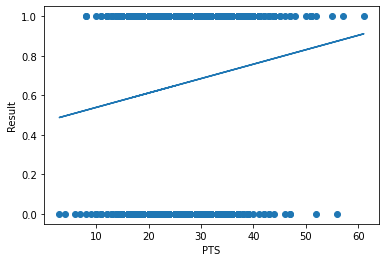

In [22]:
graph_linregress_result(train['PTS'], train['Result'], 'PTS', 'Result')

DRB for a 0.5 probability of winning: -2.417
DRB for a 0.6632 probability of winning: 6.240
R-value: 0.108384
Standard Error: 0.004866


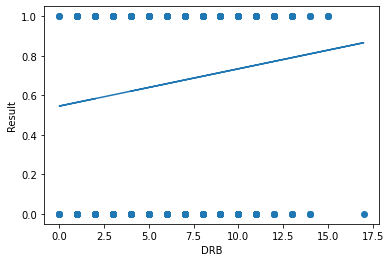

In [23]:
graph_linregress_result(train['DRB'], train['Result'], 'DRB', 'Result')

MP for a 0.5 probability of winning: 50.698
MP for a 0.6632 probability of winning: 38.385
R-value: -0.144740
Standard Error: 0.002549


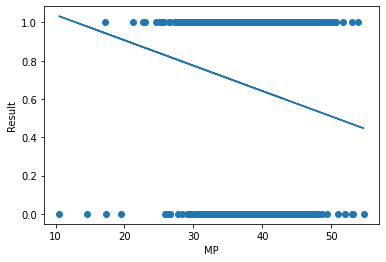

In [24]:
graph_linregress_result(train['MP'], train['Result'], 'MP', 'Result')

**Predicting 'PTS' with 'FG', '3P%', and 'MP' respectively**

R-value: 0.886740
Standard Error: 0.033119


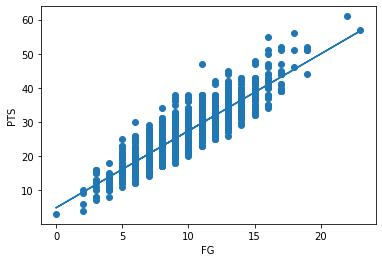

In [25]:
graph_linregress(train['FG'], train['PTS'], 'FG', 'PTS')

R-value: 0.319032
Standard Error: 0.856759


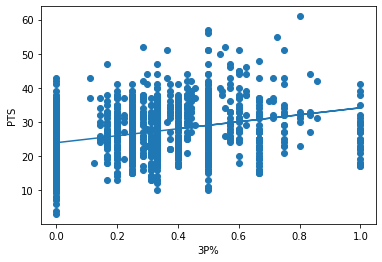

In [26]:
graph_linregress(train['3P%'], train['PTS'], '3P%', 'PTS')

R-value: 0.417122
Standard Error: 0.038722


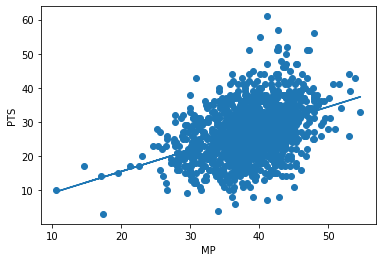

In [27]:
graph_linregress(train['MP'], train['PTS'], 'MP', 'PTS')

**Predicting '3P%' with 'PF', '3PA', and 'PTS' respectively**

R-value: 0.020700
Standard Error: 0.005347


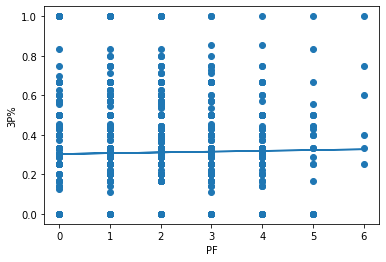

In [28]:
graph_linregress(train['PF'], train['3P%'], 'PF', '3P%')

R-value: 0.245597
Standard Error: 0.002761


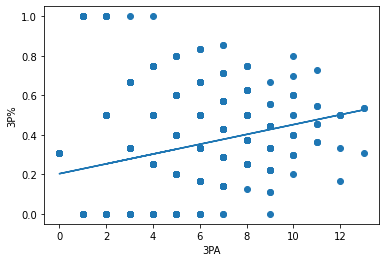

In [29]:
graph_linregress(train['3PA'], train['3P%'], '3PA', '3P%')

R-value: 0.319032
Standard Error: 0.000830


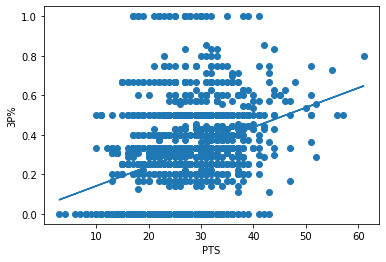

In [30]:
graph_linregress(train['PTS'], train['3P%'], 'PTS', '3P%')

-------------------
## **(2.0) Logistic Regression**


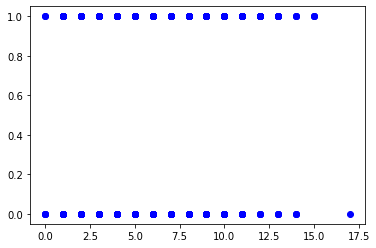

In [31]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/master/lebron_test.csv?token=ALJVHU3EDYIWQN5F4QFBHPDASKO3A')
train = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/master/lebron_train.csv?token=ALJVHU426FM6YR54DBTDEHDASKOZM')

binary_train_data = train['Result']
binary_test_data = test['Result']
predictor_data = train['DRB']
predictor_test = test['DRB']


def normalize(feature):
  feature = feature - np.mean(feature)
  feature = feature / np.std(feature)
  return feature

def n(x):
  x = x / np.max(x)
  return x

bin_train = np.array(binary_train_data).reshape(-1,1)
pred_train = np.array(predictor_data).reshape(-1,1)
pred_train = normalize(pred_train)

bin_test = np.array(binary_test_data).reshape(-1,1)
pred_test = np.array(predictor_test).reshape(-1,1)

plt.plot(predictor_data,binary_train_data, 'bo')



In [32]:
def sigmoid(x):
   return 1 / (1 + np.exp(x))

def batchUpdate(weights, binary_outcome, predictor):
  prediction =sigmoid(-predictor * weights[1] - weights[0])
  error = binary_outcome - prediction
  gradient = predictor * (error - binary_outcome)
  return np.average(gradient)

def loss(correct, prediction):
  sum = 0
  for i in range(len(correct)):
    if(correct[i] == 1): sum += -np.log(prediction[i])
    else: sum += -np.log(1 - prediction[i])
  return sum / len(correct)

def gradientDescent(weights, binary_outcome, predictor, lr):
  convergence_level = 0.00001
  iterations = 0
  weights_new = weights
  while True:
    weights_old = weights_new
    gradient = batchUpdate(weights_old, binary_outcome, predictor)
    weights_new = weights_new - lr * gradient
    if(np.any((abs(weights_old - weights_new) < convergence_level))): break
    iterations += 1
    if(iterations > 1): 
      #print("ERROR OVER 100000 iterations")
      break
    #if(iterations % 100 == 0): print(weights_new)
 # print(iterations)
  
  return weights_new


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[447.85523726 992.19088714]
0.6829268292682927


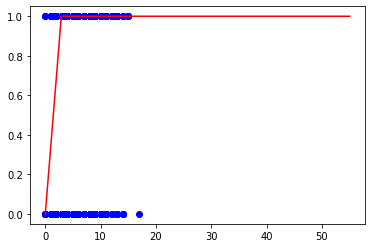

In [33]:
weights = np.array([np.random.random() * 1500, np.random.random() * 1500])
learning_rate = 0.0005
x = np.linspace(0,55,20)

weights = gradientDescent(weights, bin_train, pred_train, learning_rate)

def predict(predictors, weights):
  predictions = {}
  for p in range(len(predictors)):
    if((sigmoid(-predictors[p] * weights[1] + weights[0])) > 0.5): predictions[p] = 1
    else: predictions[p] = 0
  return predictions

def accuracy(predictions, binaries):
  num_correct = 0
  for i in range(len(predictions)):
    if(predictions[i] == binaries[i]): num_correct += 1
  return num_correct / len(predictions) 


max_weights = weights
predictions = predict(pred_test, weights)
max_accuracy = accuracy(predictions, bin_test)
for i in range(1000):
  weights = gradientDescent(weights, bin_train, pred_train, learning_rate)
  predictions = predict(pred_test, weights)
  acc = accuracy(predictions, bin_test)
  if(acc > max_accuracy): 
    max_accuracy = acc
    max_weights = weights

print(max_weights)
print(max_accuracy)
plt.plot(predictor_data,binary_train_data, 'bo')
s = sigmoid(-x * weights[1] + weights[0])
plt.plot(x, s, 'r')


-------------------
## **(3.0) PyTorch Neural Network**

In [34]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/master/lebron_test.csv?token=ALJVHU3EDYIWQN5F4QFBHPDASKO3A')
train = pd.read_csv('https://raw.githubusercontent.com/jenkins1085/MachineLebron/master/lebron_train.csv?token=ALJVHU426FM6YR54DBTDEHDASKOZM')

binary_train_data = train['Result']
binary_test_data = test['Result']
predictor_data1 = train['DRB']
predictor_test1 = test['DRB']
predictor_data2 = train['STL']
predictor_test2 = test['STL']

datanp = np.vstack((n(predictor_data1), n(predictor_data2)))

class MultiLayerPerceptron(nn.Module):
  def __init__(self, input_dimension = 2, hidden_layer_dimension = 20, sec_dimension = 5, output_dimension=1):
    super(MultiLayerPerceptron, self).__init__()
    self.lin1 = nn.Linear(input_dimension, hidden_layer_dimension)
    self.lin2 = nn.Linear(hidden_layer_dimension, output_dimension)
    #self.lin3 = nn.Linear(sec_dimension, output_dimension)

  def forward(self, x):
    x = self.lin1(x)
    x = torch.relu(x)
    x = self.lin2(x)
    x = torch.sigmoid(x)
    #x = self.lin3(x)
    #x = torch.sigmoid(x)
    return x

def initialize_random_weights(network):
  for mod in network.modules():
    if(isinstance(mod,nn.Linear)):
      mod.weight.data.normal_(0,1)


data = torch.from_numpy(n(datanp.T))
targets = torch.Tensor(binary_train_data)

neuralNet = MultiLayerPerceptron()
neuralNet.train()
initialize_random_weights(neuralNet)
bceloss = nn.BCELoss()
optimizer = torch.optim.Adam(neuralNet.parameters(), lr=0.02, betas=(0.9, 0.999))
#optimizer = torch.optim.SGD(neuralNet.parameters(),lr=0.01)

epochs = 72000
old_loss = 999999
for i in range(epochs):
  
  optimizer.zero_grad()
  output = neuralNet(data.float())
  loss = bceloss.forward(output, targets.reshape(-1,1))
  loss.backward()
  optimizer.step()

  if i % 2000 == 0:
    print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))
    if(abs(loss - old_loss) < 0.00001): break
    if(i != 0): old_loss = loss




Epoch: 0, Loss: 0.991891086101532, 
Epoch: 2000, Loss: 0.6166180372238159, 
Epoch: 4000, Loss: 0.6128321290016174, 
Epoch: 6000, Loss: 0.6122954487800598, 
Epoch: 8000, Loss: 0.6120771169662476, 
Epoch: 10000, Loss: 0.6115493774414062, 
Epoch: 12000, Loss: 0.6114287972450256, 
Epoch: 14000, Loss: 0.6114946603775024, 
Epoch: 16000, Loss: 0.6114002466201782, 
Epoch: 18000, Loss: 0.6113970279693604, 


In [ ]:

def accuracy(correct_as_ones):
  return np.sum(correct_as_ones) / correct_as_ones.shape[0]

data_testnp = np.vstack((n(predictor_test1), n(predictor_test2))).T


predictions = np.ones(data_testnp.shape[0])
for i in range(data_testnp.shape[0]):
  pred = neuralNet(torch.Tensor(data_testnp[i,:]))
  if(pred > 0.5): predictions[i] = 1
  else: predictions[i] = 0

correct_as_ones = np.zeros(predictions.shape[0])
for i in range(predictions.shape[0]):
  if(predictions[i] == binary_test_data[i]): correct_as_ones[i] = 1

print("Accuracy of prediction:")
print(accuracy(correct_as_ones))


Accuracy of prediction:
0.7317073170731707
